In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nm

from bokeh.plotting import figure
from bokeh.io import output_notebook,show

#This is a label encoder
from sklearn import preprocessing

#Classifier module import
from sklearn.neighbors import KNeighborsClassifier

#Accuracy determiner
from sklearn import metrics

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
#used local juptyer so changed the location of the file
#data = pd.read_csv('Health Systems Dataset.csv', header=0)

data = pd.read_csv('data/Health Systems Dataset.csv', header=0)

print (data)

    Country_Region  Province_State        World_Bank_Name  \
0      Afghanistan             NaN            Afghanistan   
1          Albania             NaN                Albania   
2          Algeria             NaN                Algeria   
3          Andorra             NaN                Andorra   
4           Angola             NaN                 Angola   
..             ...             ...                    ...   
205             US  Virgin Islands  Virgin Islands (U.S.)   
206            NaN             NaN     West Bank and Gaza   
207            NaN             NaN            Yemen, Rep.   
208         Zambia             NaN                 Zambia   
209       Zimbabwe             NaN               Zimbabwe   

     Health_exp_pct_GDP_2016  Health_exp_public_pct_2016  \
0                       10.2                         5.1   
1                        6.7                        41.4   
2                        6.6                        67.7   
3                       10.

In [4]:
#print the name of the features
headers = list(data.head(0))

print(headers)

['Country_Region', 'Province_State', 'World_Bank_Name', 'Health_exp_pct_GDP_2016', 'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016', 'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016', 'External_health_exp_pct_2016', 'Physicians_per_1000_2009-18', 'Nurse_midwife_per_1000_2009-18', 'Specialist_surgical_per_1000_2008-18', 'Completeness_of_birth_reg_2009-18', 'Completeness_of_death_reg_2008-16']


In [5]:
#checking for missing values
#data['Country_Region'].value_counts()
#data['Province_State'].value_counts()
#data['World_Bank_Name'].value_counts()
#data['Health_exp_pct_GDP_2016'].value_counts()
#data['Health_exp_public_pct_2016'].value_counts()
#data['Health_exp_out_of_pocket_pct_2016'].value_counts()
#data['Health_exp_per_capita_USD_2016'].value_counts()
#data['per_capita_exp_PPP_2016'].value_counts()
#data['External_health_exp_pct_2016'].value_counts()
#data['Physicians_per_1000_2009-18'].value_counts()
#data['Nurse_midwife_per_1000_2009-18'].value_counts()
#data['Specialist_surgical_per_1000_2008-18'].value_counts()
#data['Completeness_of_birth_reg_2009-18'].value_counts()
#data['Completeness_of_death_reg_2008-16'].value_counts()


In [6]:
#replacing the missing values

#replace missing values in country region
data['Country_Region'].fillna("No Name Country", inplace = True)
data['Country_Region'].value_counts()

#replace missing values in province state
data['Province_State'].fillna("No Name Province", inplace = True)
data['Province_State'].value_counts()

#replace missing values in health exp GDP
data['Health_exp_pct_GDP_2016'].fillna(0, inplace = True)
data['Health_exp_pct_GDP_2016'].value_counts()

#replace missing values in health exp public
data['Health_exp_public_pct_2016'].fillna(0, inplace = True)
data['Health_exp_public_pct_2016'].value_counts()

#replace missing values in health exp out of pocket
data['Health_exp_out_of_pocket_pct_2016'].fillna(0, inplace = True)
data['Health_exp_out_of_pocket_pct_2016'].value_counts()

#replace missing values in health exp per cap_USD
data['Health_exp_per_capita_USD_2016'].fillna(0, inplace = True)
data['Health_exp_per_capita_USD_2016'].value_counts()

#replace missing values in per capita exp
data['per_capita_exp_PPP_2016'].fillna(0, inplace = True)
data['per_capita_exp_PPP_2016'].value_counts()

#replace missing values in external health exp
data['External_health_exp_pct_2016'].fillna(0, inplace = True)
data['External_health_exp_pct_2016'].value_counts()

#replace missing values in physicians per 1k
data['Physicians_per_1000_2009-18'].fillna(0, inplace = True)
data['Physicians_per_1000_2009-18'].value_counts()

#replace missing values in nurse midwife per 1k
data['Nurse_midwife_per_1000_2009-18'].fillna(0, inplace = True)
data['Nurse_midwife_per_1000_2009-18'].value_counts()

#replace missing values in specialist surgical per 1k
data['Specialist_surgical_per_1000_2008-18'].fillna(0, inplace = True)
data['Specialist_surgical_per_1000_2008-18'].value_counts()

#replace missing values in completeness of birth reg
data['Completeness_of_birth_reg_2009-18'].fillna(0, inplace = True)
data['Completeness_of_birth_reg_2009-18'].value_counts()

#replace missing values in completeness of death reg
data['Completeness_of_death_reg_2008-16'].fillna(0, inplace = True)
data['Completeness_of_death_reg_2008-16'].value_counts()

#replace missing values in world bank name
data['World_Bank_Name'].fillna("No Name Bank", inplace = True)
data['World_Bank_Name'].value_counts()


Montenegro              1
Namibia                 1
Syrian Arab Republic    1
Korea, Rep.             1
Isle of Man             1
                       ..
Kenya                   1
Tuvalu                  1
Dominican Republic      1
Barbados                1
Niger                   1
Name: World_Bank_Name, Length: 210, dtype: int64

In [7]:
#visualise the data before we do knn
original = data[['Country_Region','per_capita_exp_PPP_2016']].copy()


In [8]:
output_notebook()

Loading BokehJS ...

In [9]:
#high spenders
high_spender= original.sort_values(by=['per_capita_exp_PPP_2016'],ascending=False)[0:20]
x=high_spender['Country_Region']
y=high_spender['per_capita_exp_PPP_2016']

p = figure(x_range=x, plot_height=250, title="Highest Spenders",
           toolbar_location=None, tools="")

p.vbar(x=x, top=y, width=0.9)
p.sizing_mode="scale_both"
p.y_range.start =0
show(p)

In [10]:
#low spenders
original= original[original['per_capita_exp_PPP_2016'] > 0].dropna()
low_spender= original.sort_values(by=['per_capita_exp_PPP_2016'],ascending=True)[0:20]
x=low_spender['Country_Region']
y=low_spender['per_capita_exp_PPP_2016']

p = figure(x_range=x, plot_height=250, title="Lowest Spenders",
           toolbar_location=None, tools="")

p.vbar(x=x, top=y, width=0.9)
p.sizing_mode="scale_both"
p.y_range.start =0
show(p)

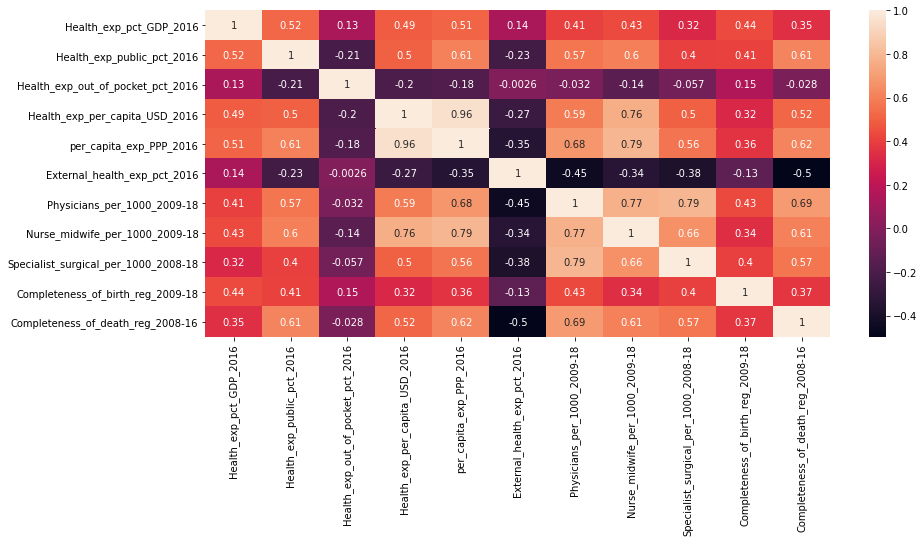

In [11]:
#show correlation between features
plt.figure(figsize=(14,6))

sns.heatmap(data.corr(), annot= True)

In [12]:
#target_names = ['high_spenders', 'low_spenders']

#creating labelEncoder
le = preprocessing.LabelEncoder()

print("This is country region data before encoding \n", data['Country_Region'], "\n")
#converting string labels into numbers

#label encoding for country region
countryRegion = data['Country_Region']
countryRegion_encoded = le.fit_transform(countryRegion)
print(countryRegion_encoded)

This is country region data before encoding 
 0          Afghanistan
1              Albania
2              Algeria
3              Andorra
4               Angola
            ...       
205                 US
206    No Name Country
207    No Name Country
208             Zambia
209           Zimbabwe
Name: Country_Region, Length: 210, dtype: object 

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31 167  32  33 167
  34  35  35  35  36  37  39  38  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  46  58  59  60  60  61  62  63  64  65
  66  46  67 163  68  69  70  71  72  73  74  75  76  77  78  79  80 167
  81  82  83  84  85  86  87 120 120  88 120  89  90  91  92  93 120  94
  95  96  97  98  99 120 100 101 102 103 120 104 105 106 120 107 108 109
 110 111 112 120 113 114 115  60 116 117 118 119 121 120 122 123 124 120
 125 126 127 128 129 130 131 163 132 133 134 135 120 139 120 140 1

In [13]:
print("This is province state before encoding \n", data['Province_State'], "\n")

#label encoding for province state
provinceState = data['Province_State']
provinceState_encoded = le.fit_transform(provinceState)
print(provinceState_encoded)

This is province state before encoding 
 0      No Name Province
1      No Name Province
2      No Name Province
3      No Name Province
4      No Name Province
             ...       
205      Virgin Islands
206    No Name Province
207    No Name Province
208    No Name Province
209    No Name Province
Name: Province_State, Length: 210, dtype: object 

[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10  0 10 10  1 10 10  6  8 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10  2 10 10 10  3 10 10 10 10 10
 10  4 10  5 10 10 10 10 10 10 10 10 10 10 10 10 10  7 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10  9 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 11 10 10 10 10 10 10 10 10 10 10 10 10 10 12 10 10
 10 10 10 10 10 10 10 10 13 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 14 10 10 10 10]


In [14]:
print("This is world bank name before encoding \n", data['World_Bank_Name'], "\n")
#label encoding for world bank name
worldBank = data['World_Bank_Name']
worldBank_encoded = le.fit_transform(worldBank)
print(worldBank_encoded)

This is world bank name before encoding 
 0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
               ...          
205    Virgin Islands (U.S.)
206       West Bank and Gaza
207              Yemen, Rep.
208                   Zambia
209                 Zimbabwe
Name: World_Bank_Name, Length: 210, dtype: object 

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  80 111  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 14

In [15]:
#making the label
#Find average first
# print(data['per_capita_exp_PPP_2016'], "\n")
# average = data['per_capita_exp_PPP_2016'].sum()/210
# print (average)
#avg = 1251

#classify the data
x = (data['per_capita_exp_PPP_2016']).copy()
for i,var in enumerate(x):
    #print(var)
    print ("index is " , str(i) , var)
    if x.iloc[i] > 1251.0:
        x.iloc[i] = "High"
    else:
        x.iloc[i] = "Low"

#fixed the error above

categorizedHealthClasses_data = x

categorizedHealthClasses_data_encoded = le.fit_transform(categorizedHealthClasses_data)
print (categorizedHealthClasses_data_encoded)

index is  0 162.8
index is  1 759.7
index is  2 998.2
index is  3 4978.7
index is  4 185.8
index is  5 976.4
index is  6 1531.0
index is  7 876.9
index is  8 4529.9
index is  9 5295.2
index is  10 1193.1
index is  11 1435.6
index is  12 1866.3
index is  13 90.6
index is  14 1323.0
index is  15 1151.4
index is  16 4667.9
index is  17 541.4
index is  18 83.5
index is  19 293.1
index is  20 496.3
index is  21 1123.4
index is  22 931.3
index is  23 1777.5
index is  24 1812.4
index is  25 1577.9
index is  26 115.6
index is  27 50.3
index is  28 347.6
index is  29 228.6
index is  30 169.3
index is  31 4718.3
index is  32 0.0
index is  33 29.9
index is  34 95.0
index is  35 0.0
index is  36 2002.0
index is  37 761.5
index is  38 0.0
index is  39 0.0
index is  40 829.8
index is  41 115.8
index is  42 34.5
index is  43 263.3
index is  44 1248.5
index is  45 162.6
index is  46 1705.2
index is  47 2457.7
index is  48 2270.8
index is  49 2484.6
index is  50 5093.0
index is  51 122.1
index is  52 5

In [16]:
#combining features
features = list(zip(countryRegion_encoded, provinceState_encoded, worldBank_encoded, data['Health_exp_pct_GDP_2016'], data['Health_exp_public_pct_2016'], data['Health_exp_out_of_pocket_pct_2016'], data['Health_exp_per_capita_USD_2016'], data['External_health_exp_pct_2016'], data['Physicians_per_1000_2009-18'], data['Nurse_midwife_per_1000_2009-18'], data['Specialist_surgical_per_1000_2008-18'], data['Completeness_of_birth_reg_2009-18'], data['Completeness_of_death_reg_2008-16']))
print(features)


[(0, 10, 0, 10.2, 5.1, 77.4, 57.2, 17.5, 0.3, 0.3, 0.0, 42.3, 0.0), (1, 10, 1, 6.7, 41.4, 58.0, 271.5, 0.7, 1.2, 3.6, 11.6, 98.4, 53.0), (2, 10, 2, 6.6, 67.7, 30.9, 260.4, 0.0, 1.8, 2.2, 12.1, 100.0, 0.0), (3, 10, 3, 10.4, 49.1, 41.7, 3834.7, 0.0, 3.3, 4.0, 83.1, 100.0, 80.0), (4, 10, 4, 2.9, 44.1, 35.2, 95.2, 3.6, 0.2, 1.3, 0.0, 25.0, 0.0), (5, 10, 5, 4.3, 60.6, 32.2, 623.1, 0.0, 2.8, 3.1, 14.0, 0.0, 79.0), (6, 10, 6, 7.5, 74.4, 15.8, 955.2, 0.6, 4.0, 2.6, 50.1, 100.0, 100.0), (7, 10, 7, 9.9, 16.5, 80.6, 358.8, 1.7, 2.9, 5.6, 86.7, 99.3, 76.0), (8, 10, 8, 9.3, 68.3, 18.9, 5002.4, 0.0, 3.6, 12.7, 45.1, 100.0, 100.0), (9, 10, 9, 10.4, 72.5, 18.9, 4688.3, 0.0, 5.1, 8.2, 109.9, 100.0, 100.0), (10, 10, 10, 6.9, 20.0, 78.9, 268.2, 0.4, 3.4, 7.0, 67.6, 0.0, 0.0), (11, 10, 11, 6.4, 49.9, 27.7, 1835.2, 0.4, 1.9, 3.1, 0.0, 0.0, 93.0), (12, 10, 12, 4.9, 61.4, 28.0, 1099.4, 0.0, 0.9, 2.5, 14.4, 0.0, 88.0), (13, 10, 13, 2.4, 18.0, 71.9, 34.2, 7.6, 0.5, 0.3, 2.9, 20.2, 0.0), (14, 10, 14, 7.0, 45.9,

In [20]:
#making the model 
#n_neighbors is the hyperparameter which is fit from 1-25
model = KNeighborsClassifier(n_neighbors = 6)

#train the model using the training sets
model.fit(features, categorizedHealthClasses_data_encoded)


#predict output
#Using the features to see if the prediction can be replicated, however, another data set can be used
predicted = model.predict(features)
print(predicted)

#testing for accuracy
print("Accuracy: ", metrics.accuracy_score(categorizedHealthClasses_data_encoded, predicted))

[1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0
 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1]
Accuracy:  0.9619047619047619


In [21]:
#scatter plot of before and after on values
country=data['Country_Region'].copy()
spending=le.inverse_transform(categorizedHealthClasses_data_encoded.copy())
predicted=le.inverse_transform(predicted.copy())

dt={'Country' : country,'Spending' :spending,'Predicted':predicted}

pd.set_option("display.max_rows", None, "display.max_columns", None)
new= pd.DataFrame (dt, columns = ['Country','Spending','Predicted'])
new

,Country,Spending,Predicted
0,Afghanistan,Low,Low
1,Albania,Low,Low
2,Algeria,Low,Low
3,Andorra,High,High
4,Angola,Low,Low
5,Antigua and Barbuda,Low,Low
6,Argentina,High,High
7,Armenia,Low,Low
8,Australia,High,High
9,Austria,High,High


In [23]:
new.to_csv(r'data\Predicted.csv', index = False)